
# Tarea N°02
## Instrucciones
1.- Completa tus datos personales (nombre y rol USM) en siguiente celda.

**Nombre**: Cristobal Salazar

**Rol**: 201669515-k

2.- Debes pushear este archivo con tus cambios a tu repositorio personal del curso, incluyendo datos, imágenes, scripts, etc.

3.- Se evaluará:

- Soluciones
- Código
- Que Binder esté bien configurado.
- Al presionar  `Kernel -> Restart Kernel and Run All Cells` deben ejecutarse todas las celdas sin error.

## I.- Clasificación de dígitos


En este laboratorio realizaremos el trabajo de reconocer un dígito a partir de una imagen.


![rgb](https://www.wolfram.com/language/11/neural-networks/assets.en/digit-classification/smallthumb_1.png)

El objetivo es a partir de los datos, hacer la mejor predicción de cada imagen. Para ellos es necesario realizar los pasos clásicos de un proyecto de _Machine Learning_, como estadística descriptiva, visualización y preprocesamiento. 

* Se solicita ajustar al menos tres modelos de clasificación:
 * Regresión logística
 * K-Nearest Neighbours 
 * Uno o más algoritmos a su elección [link](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning) (es obligación escoger un _estimator_ que tenga por lo menos un hiperparámetro). 
 
 
* En los modelos que posean hiperparámetros es mandatorio buscar el/los mejores con alguna técnica disponible en `scikit-learn` ([ver más](https://scikit-learn.org/stable/modules/grid_search.html#tuning-the-hyper-parameters-of-an-estimator)).
* Para cada modelo, se debe realizar _Cross Validation_ con 10 _folds_ utilizando los datos de entrenamiento con tal de determinar un intervalo de confianza para el _score_ del modelo.
* Realizar una predicción con cada uno de los tres modelos con los datos _test_ y obtener el _score_. 
* Analizar sus métricas de error (**accuracy**, **precision**, **recall**, **f-score**)



### Exploración de los datos
A continuación se carga el conjunto de datos a utilizar, a través del sub-módulo `datasets` de `sklearn`.

In [108]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [109]:
digits_dict = datasets.load_digits()
print(digits_dict["DESCR"])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [110]:
digits_dict.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [111]:
digits_dict["target"]

array([0, 1, 2, ..., 8, 9, 8])

A continuación se crea dataframe declarado como `digits` con los datos de `digits_dict` tal que tenga 65 columnas, las 6 primeras a la representación de la imagen en escala de grises (0-blanco, 255-negro) y la última correspondiente al dígito (`target`) con el nombre _target_.

In [112]:
digits = (
    pd.DataFrame(
        digits_dict["data"],
    )
    .rename(columns=lambda x: f"c{x:02d}")
    .assign(target=digits_dict["target"])
    .astype(int)
)

digits.head()

,c00,c01,c02,c03,c04,c05,c06,c07,c08,c09,...,c55,c56,c57,c58,c59,c60,c61,c62,c63,target
0,0,0,5,13,9,1,0,0,0,0,...,0,0,0,6,13,10,0,0,0,0
1,0,0,0,12,13,5,0,0,0,0,...,0,0,0,0,11,16,10,0,0,1
2,0,0,0,4,15,12,0,0,0,0,...,0,0,0,0,3,11,16,9,0,2
3,0,0,7,15,13,1,0,0,0,8,...,0,0,0,7,13,13,9,0,0,3
4,0,0,0,1,11,0,0,0,0,0,...,0,0,0,0,2,16,4,0,0,4


### Ejercicio 1
**Análisis exploratorio:** Realiza tu análisis exploratorio, no debes olvidar nada! Recuerda, cada análisis debe responder una pregunta.

Algunas sugerencias:

* ¿Cómo se distribuyen los datos?
* ¿Cuánta memoria estoy utilizando?
* ¿Qué tipo de datos son?
* ¿Cuántos registros por clase hay?
* ¿Hay registros que no se correspondan con tu conocimiento previo de los datos?

In [ ]:
print("Los datos de distribuyen en arreglos de 64 casillas")

In [ ]:
#Memoria ocupada
print("Los datos son del tipo:",type(digits_dict['data'][0,0]))
print('El numero de bits que ocupa un float es de 64')
print("La cantidad de datos es:", digits_dict['data'].size)
print("\nLa cantidad de memoria ocupada es de:",digits_dict['data'].size*64,"bits")

In [ ]:
#Registros por clase
for i in digits['target'].unique():
    mask= (digits['target']==i)
    k=len(digits[mask]['target'])
    print("La cantidad de registros de la clase",i,"es de",k)

### Ejercicio 2
**Visualización:** Para visualizar los datos utilizaremos el método `imshow` de `matplotlib`. Resulta necesario convertir el arreglo desde las dimensiones (1,64)  a (8,8) para que la imagen sea cuadrada y pueda distinguirse el dígito. Superpondremos además el label correspondiente al dígito, mediante el método `text`. Esto nos permitirá comparar la imagen generada con la etiqueta asociada a los valores. Realizaremos lo anterior para los primeros 25 datos del archivo.

In [ ]:
digits_dict["images"][0]

Visualiza imágenes de los dígitos utilizando la llave `images` de `digits_dict`. 

Sugerencia: Utiliza `plt.subplots` y el método `imshow`. Puedes hacer una grilla de varias imágenes al mismo tiempo!

In [ ]:
nx, ny = 5, 5
fig, axs = plt.subplots(nx, ny, figsize=(12, 12))
n=0
for i in range(1,26):
    etiqueta=['0','1','2','3','4','5','6','7','8','9']
    img=digits_dict["images"][i-1]
    fig.add_subplot(nx,ny,i)
    plt.imshow(img)
    plt.text(4,4,etiqueta[n],fontsize=50,color='r')
    n+=1
    if n==(len(etiqueta)):
        n=0
plt.show()

### Ejercicio 3

**Machine Learning**: En esta parte usted debe entrenar los distintos modelos escogidos desde la librería de `skelearn`. Para cada modelo, debe realizar los siguientes pasos:

* **train-test** 
 * Crear conjunto de entrenamiento y testeo (usted determine las proporciones adecuadas).
 * Imprimir por pantalla el largo del conjunto de entrenamiento y de testeo.
 
 
* **modelo**:
 * Instanciar el modelo objetivo desde la librería sklearn.
 * *Hiper-parámetros*: Utiliza `sklearn.model_selection.GridSearchCV` para obtener la mejor estimación de los parámetros del modelo objetivo.




* **Métricas**:
 * Graficar matriz de confusión.
 * Analizar métricas de error.



__Preguntas a responder:__

* ¿Cuál modelo es mejor basado en sus métricas?
* ¿Cuál modelo demora menos tiempo en ajustarse?
* ¿Qué modelo escoges?


In [113]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from metrics_classification import *
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from time import time

In [116]:
X = digits.drop(columns="target").values
Y = digits["target"].values

In [117]:
#Por simplicidad se usara la misma proporcion de datos para los 3 modelos que se utilizaran
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 15)

In [118]:
print('Separando informacion:\n')
print('numero de filas data original : ',len(X))
print('numero de filas train set     : ',len(X_train))
print('numero de filas test set      : ',len(X_test))

Separando informacion:

numero de filas data original :  1797
numero de filas train set     :  1437
numero de filas test set      :  360


In [119]:
rlog = LogisticRegression()
NB = KNeighborsClassifier()
DTR = DecisionTreeRegressor()


In [120]:
ti=time()
rlog.fit(X_train, Y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de rlog es de", tp, "segundos")

el tiempo de ejecucion de rlog es de 10.605993509292603 segundos


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [121]:
ti=time()
NB.fit(X_train, Y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de NB es de", tp, "segundos")

el tiempo de ejecucion de NB es de 0.010581016540527344 segundos


In [106]:
ti=time()
svc.fit(X_train, Y_train)
tf=time()
tp=tf-ti
print("el tiempo de ejecucion de DTR es de", tp, "segundos")

el tiempo de ejecucion de DTR es de 0.14828991889953613 segundos


In [122]:
y_true =  list(Y_test)
y_pred = list(rlog.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred)) 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)



Matriz de confusion:
 
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 37  0  0  0  0  0  0  1  0]
 [ 0  1 37  0  0  0  0  0  0  0]
 [ 0  0  0 25  0  1  0  0  1  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 34  0  0  0  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  0  0  0  1  0  0  0 34  0]
 [ 0  0  0  1  0  0  0  0  1 41]]

Metricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'

   accuracy  recall  precision  fscore
0     0.975  0.9743     0.9753  0.9746


In [123]:
y_true =  list(Y_test)
y_pred = list(NB.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred)) 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)


Matriz de confusion:
 
[[31  0  0  0  0  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 27  0  0  0  0  0  0]
 [ 0  0  0  0 41  0  0  0  0  0]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  1  0  1  0  0  0  0 33  0]
 [ 0  0  0  2  0  0  0  0  0 41]]

Metricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'

   accuracy  recall  precision  fscore
0    0.9889  0.9896     0.9874  0.9881


In [124]:
y_true =  list(Y_test)
y_pred = list(svc.predict(X_test))

print('\nMatriz de confusion:\n ')
print(confusion_matrix(y_true,y_pred)) 
df_temp = pd.DataFrame(
    {
        'y':y_true,
        'yhat':y_pred
        }
)

df_metrics = summary_metrics(df_temp)
print("\nMetricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'")
print("")
print(df_metrics)


Matriz de confusion:
 
[[30  0  0  0  1  0  0  0  0  0]
 [ 0 38  0  0  0  0  0  0  0  0]
 [ 0  0 38  0  0  0  0  0  0  0]
 [ 0  0  0 26  0  0  0  0  1  0]
 [ 0  0  0  0 40  0  0  0  0  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  2  0  0  0  0  0  0 33  0]
 [ 0  0  0  1  0  0  0  0  0 42]]

Metricas para los regresores : 'sepal length (cm)' y  'sepal width (cm)'

   accuracy  recall  precision  fscore
0    0.9833  0.9826     0.9836   0.983


In [ ]:
# Observar que el modelo NB es mejor ya que en las 4 metricas tiene valores mas cercanos a 1, lo que representa una mayor 
# precicion. Ademas el modelo NB tiene menor tiempo de ejecucion que los otros 2. Entonces por ambos motivos se escoge el modelo
# NB

### Ejercicio 4

__Comprensión del modelo:__ Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, debe comprender e interpretar minuciosamente los resultados y gráficos asocados al modelo en estudio, para ello debe resolver los siguientes puntos:



 * **Cross validation**: usando **cv** (con n_fold = 10), sacar una especie de "intervalo de confianza" sobre alguna de las métricas estudiadas en clases: 
  * $\mu \pm \sigma$ = promedio $\pm$ desviación estandar
 * **Curva de Validación**: Replica el ejemplo del siguiente [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve.html#sphx-glr-auto-examples-model-selection-plot-validation-curve-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.
 * **Curva AUC–ROC**: Replica el ejemplo del siguiente  [link](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py) pero con el modelo, parámetros y métrica adecuada. Saque conclusiones del gráfico.

In [ ]:
NB.get_params()

In [21]:
from sklearn.model_selection import cross_validate,StratifiedKFold

# creando pliegues

skf = StratifiedKFold(n_splits=10,
                      random_state=2016)
precision = []
model =  KNeighborsClassifier()

skf.get_n_splits(X_train, Y_train)
for k, (train_index, test_index) in enumerate(skf.split(X, Y)):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    model.fit(X_train,Y_train) 
    score = model.score(X_test,Y_test)
    precision.append(score)
    print('Pliegue: {0:}, Dist Clase: {1:}, Prec: {2:.3f}'.format(k+1,
                        np.bincount(Y_train), score))

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/model_selection/_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Pliegue: 1, Dist Clase: [160 164 159 165 162 164 163 161 157 162], Prec: 0.928
Pliegue: 2, Dist Clase: [160 164 159 165 163 163 163 161 157 162], Prec: 0.983
Pliegue: 3, Dist Clase: [160 164 159 165 163 163 163 161 157 162], Prec: 0.978
Pliegue: 4, Dist Clase: [160 164 159 165 163 164 162 162 156 162], Prec: 0.956
Pliegue: 5, Dist Clase: [160 164 159 165 163 164 163 161 156 162], Prec: 0.972
Pliegue: 6, Dist Clase: [160 164 159 165 163 164 163 161 156 162], Prec: 0.972
Pliegue: 7, Dist Clase: [160 164 159 165 163 164 163 161 156 162], Prec: 0.989
Pliegue: 8, Dist Clase: [160 164 160 164 163 164 163 161 157 162], Prec: 0.983
Pliegue: 9, Dist Clase: [161 163 160 164 163 164 163 161 157 162], Prec: 0.983
Pliegue: 10, Dist Clase: [161 163 160 164 163 164 163 161 157 162], Prec: 0.966


In [22]:
from sklearn.model_selection import cross_val_score

model =  KNeighborsClassifier()

precision = cross_val_score(estimator=model,
                            X=X_train,
                            y=Y_train,
                            cv=10)
precision = [round(x,2) for x in precision]
print('Precisiones: {} '.format(precision))
print('Intervalo de confianza: {0: .3f} +/- {1: .3f}'.format(np.mean(precision),
                                          np.std(precision)))

Precisiones: [0.93, 0.99, 0.99, 0.97, 0.96, 0.97, 0.98, 0.99, 0.99, 0.97] 
Intervalo de confianza:  0.974 +/-  0.018


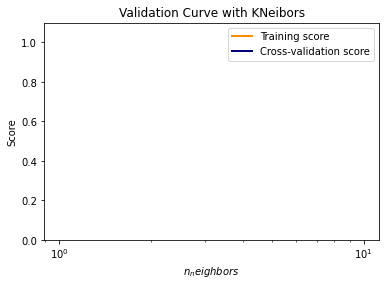

In [34]:
from sklearn.datasets import load_digits
from sklearn.model_selection import validation_curve

X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, -1, 5)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, param_name='n_neighbors', param_range=param_range,
     scoring="f1_weighted", n_jobs=4)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve with KNeibors")
plt.xlabel(r"$n_neighbors$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [32]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

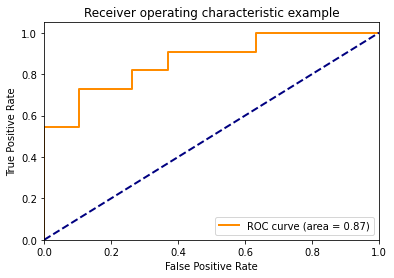

In [33]:
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Ejercicio 5
__Reducción de la dimensión:__ Tomando en cuenta el mejor modelo encontrado en el `Ejercicio 3`, debe realizar una redcción de dimensionalidad del conjunto de datos. Para ello debe abordar el problema ocupando los dos criterios visto en clases:  

* **Selección de atributos**
* **Extracción de atributos**

__Preguntas a responder:__

Una vez realizado la reducción de dimensionalidad, debe sacar algunas estadísticas y gráficas comparativas entre el conjunto de datos original y el nuevo conjunto de datos (tamaño del dataset, tiempo de ejecución del modelo, etc.)


### Ejercicio 6


__Visualizando Resultados:__ A continuación se provee código para comparar las etiquetas predichas vs las etiquetas reales del conjunto de _test_. 


In [80]:
def mostar_resultados(digits,model,nx=5, ny=5,label = "correctos"):
    """
    Muestra los resultados de las prediciones de un modelo 
    de clasificacion en particular. Se toman aleatoriamente los valores
    de los resultados.
    
    - label == 'correcto': retorna los valores en que el modelo acierta.
    - label == 'incorrecto': retorna los valores en que el modelo no acierta.

    
    Observacion: El modelo que recibe como argumento debe NO encontrarse
    'entrenado'.
    
    
    :param digits: dataset 'digits'
    :param model: modelo de sklearn
    :param nx: numero de filas (subplots)
    :param ny: numero de columnas (subplots)
    :param label: datos correctos o incorrectos
    :return: graficos matplotlib
    """
    
    
    X = digits.drop(columns="target").values
    Y = digits["target"].values
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 42) 
    model.fit(X_train, Y_train) # ajustando el modelo
    y_pred = list(model.predict(X_test))

    
    # Mostrar los datos correctos
    if label=="correctos":
        mask = (y_pred == Y_test)
        color = "green"
        
    # Mostrar los datos correctos
    elif label=="incorrectos":
        mask = (y_pred != Y_test)
        color = "red"
    
    else:
        raise ValueError("Valor incorrecto")
        
    X_aux = X_test[mask]
    y_aux_true = Y_test[mask]
    y_aux_pred = y_pred

    # We'll plot the first 100 examples, randomly choosen
    fig, ax = plt.subplots(nx, ny, figsize=(12,12))
    for i in range(nx):
        for j in range(ny):
            index = j + ny * i
            data  = X_aux[index, :].reshape(8,8)
            label_pred = str(int(y_aux_pred[index]))
            label_true = str(int(y_aux_true[index]))
            ax[i][j].imshow(data, interpolation='nearest', cmap='gray_r')
            ax[i][j].text(0, 0, label_pred, horizontalalignment='center', verticalalignment='center', fontsize=10, color=color)
            ax[i][j].text(7, 0, label_true, horizontalalignment='center', verticalalignment='center', fontsize=10, color='blue')
            ax[i][j].get_xaxis().set_visible(False)
            ax[i][j].get_yaxis().set_visible(False)
    plt.show()

**Pregunta**

* Tomando en cuenta el mejor modelo entontrado en el `Ejercicio 3`, grafique los resultados cuando:
 * el valor predicho y original son iguales
 * el valor predicho y original son distintos 


* Cuando el valor predicho y original son distintos ,  ¿Por qué ocurren estas fallas?

In [ ]:
NB=KNeighborsClassifier()
mostar_resultados(digits,NB,nx=5, ny=5,label = "correctos")

In [ ]:
NB=KNeighborsClassifier()
mostar_resultados(digits,NB,nx=2, ny=2,label = "incorrectos")

In [129]:
print("Se tiene que el modelo NB no es 100% acertado, segun su metrica 'accurasy' es igual a 0.975, podria decirse")
print("que de 100 casos falla entre 2 y 3 veces, la funcion examina 100 casos aleatoriamente, de los cuales solo 5 son") 
print("incorrectos, lo cual se aproxima al valor de la metrica en porcentaje.")      


Se tiene que el modelo NB no es 100% acertado, segun su metrica 'accurasy' es igual a 0.975, podria decirse
que de 100 casos falla entre 2 y 3 veces, la funcion examina 100 casos aleatoriamente, de los cuales solo 5 son
incorrectos, lo cual se aproxima al valor de la metrica en porcentaje.


### Ejercicio 7
**Conclusiones**: Entrega tu veredicto, responde las preguntas iniciales, visualizaciones, trabajos futuros, dificultades, etc.

In [ ]:
""""""